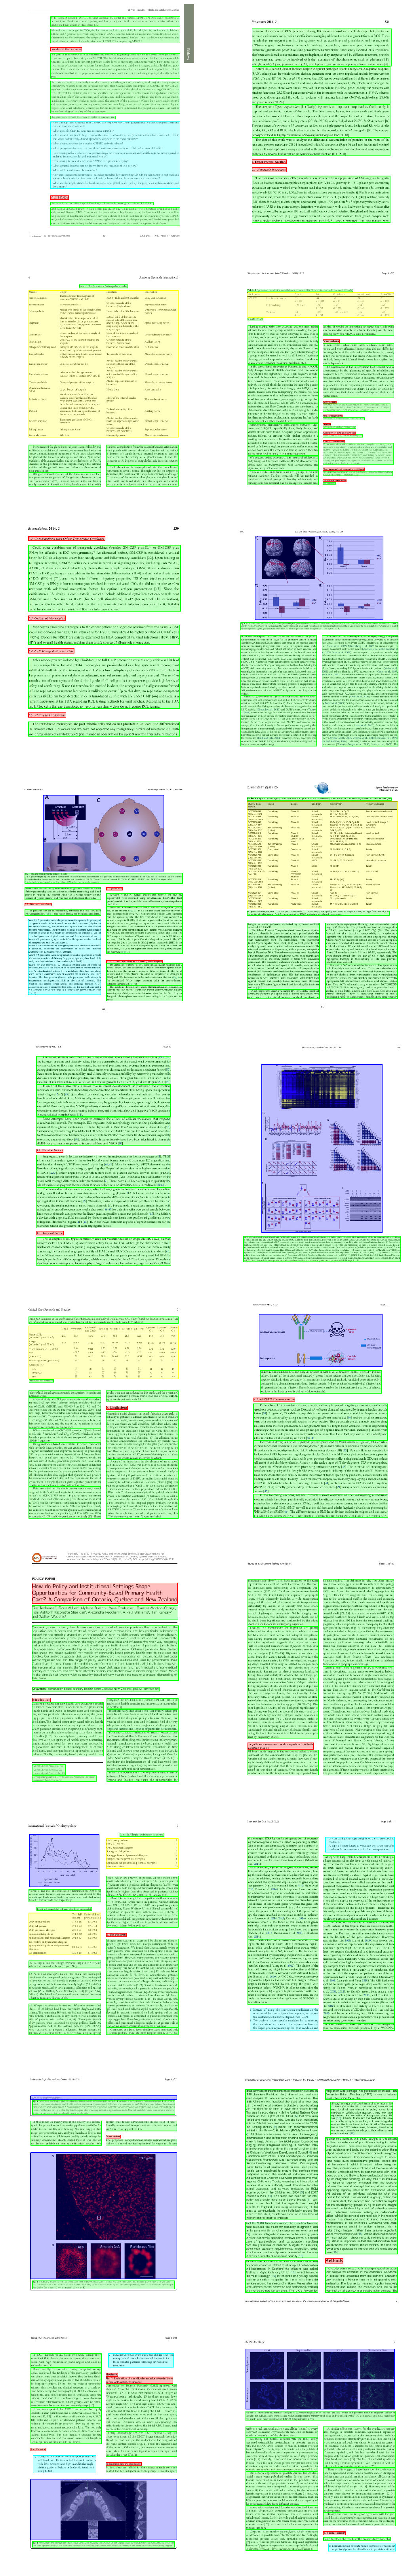

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import json
from PIL import ImageFont, ImageDraw
from glob import glob
import numpy as np

colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

def markup(image, annotations):
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        draw.rectangle(
            (int(round(annotation['bbox'][0])),
             int(round(annotation['bbox'][1])),
             int(round(annotation['bbox'][0] + annotation['bbox'][2])),
             int(round(annotation['bbox'][1] + annotation['bbox'][3]))),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,),
            width=2
        )
    return np.array(image)

with open('samples.json', 'r') as fp:
    samples = json.load(fp)
    
for image in samples['images']:
    image['annotations'] = []
    for ann in samples['annotations']:
        if ann['image_id'] == image['id']:
            image['annotations'].append(ann)

fig=plt.figure(figsize=(18, 120)) 
for i, image in enumerate(samples['images']):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(10, 2, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
plt.subplots_adjust(hspace=0)